In [9]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['harmful','harmless']
for i in CATEGORIES:
    class_num = CATEGORIES.index(i)
    path = os.path.join(DATADIR,i)
   
    for img in os.listdir(path):
        img_array = imread(os.path.join(path,img))
        img_resized = resize(img_array,(150,150,3))
        flat_data.append(img_resized.flatten())
        images.append(img_resized)
        target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)






In [2]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size = 0.3,random_state = 42)

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
            {'C':[1,10,100,1000],'kernel':['linear'],
             'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']
            }
]

svc = svm.SVC(probability = True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [5]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [10]:
accuracy_score(y_pred,y_test)

0.76

In [11]:
confusion_matrix(y_pred,y_test)

array([[16, 10],
       [ 8, 41]])

In [12]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [14]:
model = pickle.load(open('img_model.p','rb'))

Enter your image URL/content/images/harmless/download (1).jpeg
(225, 225, 3)
The object in the image is  harmless


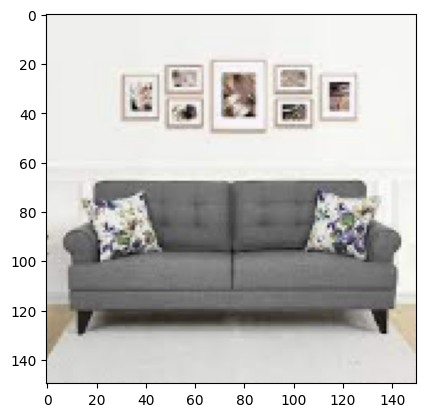

In [18]:
flat_data = []
url = input('Enter your image URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print("The object in the image is ",y_out)